# Detecting Twitter Bots Using Machine Learning

## Models used during the midway report

Anantha Natarajn Selvaganapathy<br/>
N16989511<br/>
ans599<br/>
http://ananth.co.in

The objective of this project is to use machine learning techniques to detect weather a given Twitter account is a bot or not. 

We will be using various machine learning algorithms and compare and analyze their predictions. We will also explore the use of deep learning techniques and compare their results with regression and classification algorithms. 



Before we begin, we import all the required libraries. We will be using sklearn for all the machine learning models, and pandas and numpy for data manipulation and cleaning.

We also use matplotlib and seaborn for plots.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


% matplotlib inline

We load the datasets into a pandas dataframe. The `describe` method gives us a quick glimpse of the dataset.

In [20]:
bot_data = pd.read_csv('bots_data.csv', encoding = "ISO-8859-1")

new_bot_data = pd.read_csv('./training_data_2_csv_UTF.csv', encoding = "utf-8")


nonbot_data = pd.read_csv('nonbots_data.csv', encoding = "ISO-8859-1")

print("Bot data shape:", bot_data.shape)
print("Non bot data shape:", nonbot_data.shape)

print(nonbot_data.columns)

# print("BOT DATA:")
# print(old_bot_data.describe())

# print("\nNON BOT DATA:")
# print(nonbot_data.describe())


Bot data shape: (1056, 20)
Non bot data shape: (1176, 20)
Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


In [21]:
bot_data

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1
5,7.300000e+17,7.30E+17,glossatory,Australah,SOCIAL ON GLOSSATORY: the branch of the consid...,https://t.co/hcUNcUdlcq,16,1,4,5/11/2016 5:45,0,False,1832,en,"Status(in_reply_to_user_id=None, favorited=Fal...",False,False,False,GLOSSATORY,1
6,8.200000e+17,8.20E+17,Fancypants6047,vancouver,NaN,NaN,41,394,0,13/01/2017 19:37,3,False,4,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,Fancypants,1
7,2.602217e+09,2602217174,Hedgehogize,Moebius,@Hedgehogize me or @Hedgehogize NAME to unlock...,http://t.co/a1UvEiAl3u,549,370,12,Thu Jul 03 20:37:48 +0000 2014,12,False,4658,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,YOU the Hedgehog,1
8,8.330000e+17,8.33E+17,jamieph93986621,NaN,"I wasn't bor ysterday, was born tomorrow",NaN,0,60,0,Sun Feb 19 03:47:42 +0000 2017,0,False,10,en,"{""created_at"": ""Mon Mar 13 02:55:10 +0000 2017...",True,False,False,Jamie Phillips,1
9,8.250000e+17,8.25E+17,NothemDonella,NaN,Your diac No,NaN,0,43,4,Fri Jan 27 15:51:34 +0000 2017,48,False,86,en,"{""created_at"": ""Mon Mar 13 02:52:13 +0000 2017...",True,False,False,Donella Nothem,1


In [22]:
frames = [bot_data, nonbot_data]
dataset = pd.concat(frames)

df1 = pd.concat(frames)
vectorizer = CountVectorizer(min_df=1)

from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

dataset['location'] = dataset['location'].fillna('none')
train_data_features = vectorizer.fit_transform(dataset['location'])

train_data_features = train_data_features.toarray()
train_data_features = pd.DataFrame(data=train_data_features[:,:],    
              index=train_data_features[:,0])


0                              
1                              
2                              
3        http://t.co/PdagJGqVMR
4                              
5       https://t.co/hcUNcUdlcq
6                              
7        http://t.co/a1UvEiAl3u
8                              
9                              
10                             
11      https://t.co/1nSo6q0iJq
12                             
13       http://t.co/HGEP3DYuKt
14                         None
15                             
16      https://t.co/S4EJdKUDqR
17                             
18                             
19                         None
20                         null
21                             
22                             
23       http://t.co/DvFcRN3FL2
24       http://t.co/gGVsMUFrHJ
25                             
26       http://t.co/LSHh2n5xxO
27                             
28       http://t.co/62l7zbauj1
29       http://t.co/w2VVpXExUo
                 ...           
1146    

## Random Forrest Classifier

We saw that the dataset is fairly clean. For our first attempt, let's just use the features present in the dataset as such.

Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging. Random Forests grows many classification trees. 

After merging the bot and non bot data sets, we shuffle the data set using the shuffle method provided by sklearn. Shuffling the data set is necessary in order to get an unbiased split in the training and test dataset.

Then, we initialize the classifier. We create the classifier by calling the constructor with the required parameters. The `n_estimators` is the number of trees in the forest. Based on trail and error, we estimate that the optimal number of trees after with the accuracy stagnates is 100. The `min_sample_split` is the minimum number of samples required to split an internal node. 


#### One of the models used to generate predictions. The results were stored in disk, and will be accessed in the final part of the pipeline during the vote.

In [24]:
# randomForrest = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=0)
# X = dataset[[ 'followers_count', 'friends_count', 'listedcount', 
#        'favourites_count', 'verified', 'statuses_count',
#        'default_profile', 'default_profile_image']]
# y = dataset[['bot']]

# x_test = X[-200:]
# X = X[:-200]

# y_test = y[-200:]
# y = y[:-200]


# randomForrest.fit(X.values, y.values.ravel())


# scores = cross_val_score(randomForrest, X.values, y.values.ravel())
# print (scores.mean())

### New features: check if 'bot' is present in text columns. Include if location exists. Add length of id.

In [166]:
frames = [new_bot_data]
dataset = pd.concat(frames)

dataset["url"].fillna("")

dataset['status'] = dataset['status'].apply(lambda x: int(len(str(x))))

dataset['screen_name'] = dataset['screen_name'].apply(lambda x: ('bot' in x.lower() or 'truther' in x.lower()))
dataset['description'] = dataset['description'].apply(lambda x: 'bot' in str(x).lower())
dataset['url'] = dataset['url'].apply(lambda x: 1 if 'http' in str(x).lower() else 0)

dataset['name'] = dataset['name'].apply(lambda x: int('bot' in str(x).lower()))
dataset['location'] = dataset['location'].apply(lambda x: int(len(str(x))))
dataset['id_len'] = dataset['id'].apply(lambda x: int(len(str(x))))

dataset = shuffle(dataset)

randomForrest = RandomForestClassifier(n_estimators=200, 
                                       min_samples_split=5, 
                                       random_state=0, max_features=6)

X = dataset[['screen_name', 'description','followers_count', 'friends_count', 
             'listedcount', 'favourites_count', 'verified', 
             'statuses_count', 'status', 'default_profile', 'url', 'location', 'name', 'id_len',
             'default_profile_image']]

y = dataset[['bot']]

x_test = X[-300:]
y_test = y[-300:]
X = X[:-300]
y = y[:-300]

randomForrest.fit(X.values, y.values.ravel())


scores = cross_val_score(randomForrest, X.values, y.values.ravel())
print (scores.mean())

pred = randomForrest.predict(x_test)
y_test = y_test.values
y_test = y_test.ravel()
print(accuracy_score(y_test, pred))

0.92071395866
0.92


In [136]:
randomForrest.fit(X.values, y.values.ravel())


scores = cross_val_score(randomForrest, X.values, y.values.ravel())
print (scores.mean())

pred = randomForrest.predict(x_test)
y_test = y_test.values
y_test = y_test.ravel()
print(accuracy_score(y_test, pred))


In [167]:
predictX = pd.read_csv('./test_data_4_students.csv', encoding = "ISO-8859-1")


x_test = predictX[['screen_name', 'description','followers_count', 'friends_count', 
             'listed_count', 'favorites_count', 'verified', 
             'statuses_count', 'status', 'default_profile', 'url', 'location', 'name', 'id',
             'default_profile_image']]

x_test = x_test[:575]


x_test['screen_name'] = x_test['screen_name'].apply(lambda x: int(('bot' in x.lower() or 'truther' in x.lower())))
x_test['description'] = x_test['description'].apply(lambda x: int('bot' in str(x).lower()))
x_test['listed_count'] = x_test['listed_count'].apply(lambda x: 0 if str(x) == "None" else int(x))
x_test['favorites_count'] = x_test['favorites_count'].apply(lambda x: 0 if str(x) == "None" else int(x))
x_test['followers_count'] = x_test['followers_count'].apply(lambda x: 0 if str(x) == "None" else int(x))
x_test['friends_count'] = x_test['friends_count'].apply(lambda x: 0 if str(x) == "None" else int(x))

x_test['verified'] = x_test['verified'].apply(lambda x: 1 if str(x) == "TRUE" else 0)
x_test['statuses_count'] = x_test['statuses_count'].apply(lambda x: int(x))
x_test['status'] = x_test['status'].apply(lambda x: int(len(str(x))))
x_test['default_profile'] = x_test['default_profile'].apply(lambda x: 1 if x == "TRUE" else 0)
x_test['default_profile_image'] = x_test['default_profile_image'].apply(lambda x: 1 if x == "TRUE" else 0)

x_test['url'] = x_test['url'].apply(lambda x: 1 if 'http' in str(x).lower() else 0)
x_test['location'] = x_test['location'].apply(lambda x: int(len(str(x))))
x_test['name'] = x_test['name'].apply(lambda x: int('bot' in str(x).lower()))
x_test['id_len'] = x_test['id'].apply(lambda x: int(len(str(x))))

x_test = x_test[['screen_name', 'description','followers_count', 'friends_count', 
             'listed_count', 'favorites_count', 'verified', 
             'statuses_count', 'status', 'default_profile', 'url', 'location', 'name', 'id_len',
             'default_profile_image']]
# x_test.fillna(0)
# x_test.fillna(value=0, inplace=True)
# x_test[x_test['followers_count'].isnan()]
# x_test.isnull().any()

pred = randomForrest.predict(x_test.values)


In [168]:
ids = predictX['id'][:575]
with open('ans599_2_tunePrams_addLocNameUrl_idLen.csv', 'w') as the_file:
    the_file.write("id,bot\n")    
    for i in range(575):
        the_file.write(str(int(ids[i])) +","+ str(pred[i])+"\n") 


#### Result
The random forrest classifier gives us a cross-validation score of around 0.9 and a accuracy of 90%-93% on previously 
unseen data

### Analysing the features

Let's visualize the some of the features we chose for the model above to understand it's contribution to the prediction.

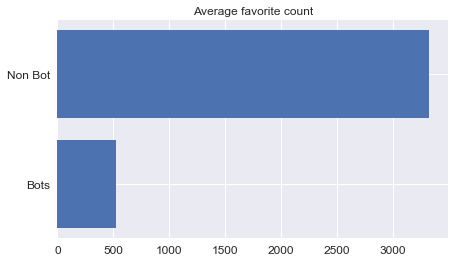

In [7]:
bot_fav = np.mean(bot_data["favourites_count"].values)
nonbot_fav = np.mean(nonbot_data["favourites_count"].values)

plt.figure(figsize=(7,4))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.title('Average favorite count')
plt.yticks([1,2], ["Bots", "Non Bot" ])

plt.barh([1,2], [bot_fav, nonbot_fav])
plt.show()

We use a Kernal Density Estimate to visualize the distribution of ‘favorites_count’ in the dataset. The red line corresponds to bot accounts and the blue line to non bot accounts. As we see, non bot accounts tend to have higher number of favorites, and a lot of accounts have more than 15,000 favorites – when almost no bot account has those many favorites. This is a very good sign of a good feature. This can further be verified by looking at the average number of favorites by each category 

#### Favorite Count

/Users/sananth12/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[]

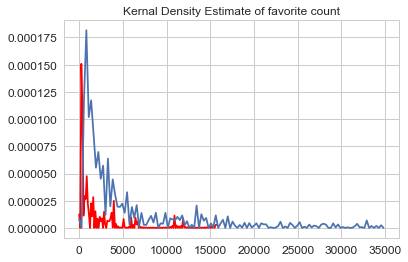

In [8]:

sns.set_style('whitegrid')

sns.kdeplot(np.array(sorted(bot_data["favourites_count"].values))[:-10], bw=0.5, color='red')
sns.kdeplot(np.array(sorted(nonbot_data["favourites_count"].values))[:-10], bw=0.5)

plt.title('Kernal Density Estimate of favorite count')
plt.plot()

#### Followers Count

/Users/sananth12/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[]

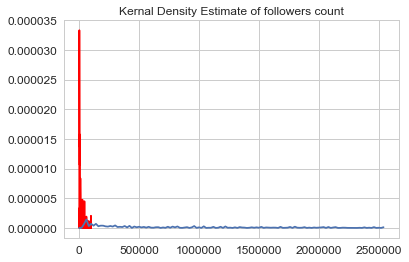

In [9]:
sns.set_style('whitegrid')

sns.kdeplot(np.array(sorted(bot_data["followers_count"].values))[:-10], bw=0.5, color='red')
sns.kdeplot(np.array(sorted(nonbot_data["followers_count"].values))[:-150], bw=0.5)

plt.title('Kernal Density Estimate of followers count')
plt.plot()

#### Account Name

A similar interesting but obvious observation can be made by looking at Fig 1.4 and Fig 1.5, which display the accounts that contain the word `bot` in their name. The bot dataset has a lot of accounts contain the word `bot` in their name. A few non bot account seem to contain the word too, but it could be names like Abbot, Longbottom, Botha, etc.


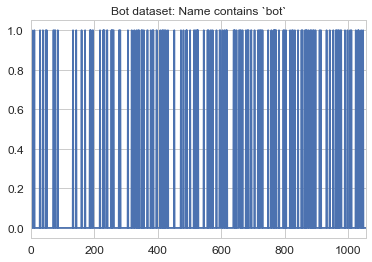

In [10]:
hasBot = bot_data['name'].apply(lambda x: 'bot' in x.lower())
hasBot.plot()

plt.title("Bot dataset: Name contains `bot`")

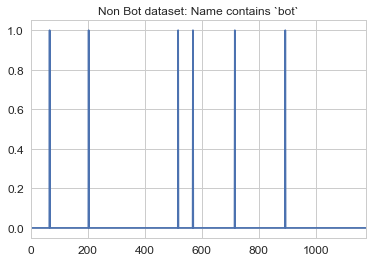

In [11]:
hasBot = nonbot_data['name'].apply(lambda x: 'bot' in x.lower())
hasBot.plot()

plt.title("Non Bot dataset: Name contains `bot`")

## Using SVM Classification

Support Vector Machines are perhaps one of the most popular and talked about machine learning algorithms. In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

Let's use the features in SVM and compare the accuracy.

In [12]:
dataset = shuffle(dataset)

X = dataset[[ 'screen_name', 'description','followers_count', 'friends_count', 
       'favourites_count', 'verified', 'default_profile_image']]
y = dataset[['bot']]


x_test = X[-100:]
y_test = y[-100:]
X = X[:-100]
y = y[:-100]

SVM_clf = svm.SVC()
SVM_clf.fit(X.values, y.values.ravel())  

scores = cross_val_score(SVM_clf, X.values, y.values.ravel())
print (scores.mean())

0.669791934919


In [13]:
pred = SVM_clf.predict(x_test)
y_test = y_test
y_test = y_test.values.ravel()
print(accuracy_score(y_test, pred))

0.55


#### Result
The SVM classifier gives a corss-validation score of 0.66 and varying accuracy between 65%-72% on unseen test data.